In [118]:
# Computer Vision
# Assignment - 1
# Problem: Image Filtering


In [119]:
# Required Libraries
import cv2
import PIL
import numpy as np
import matplotlib.pyplot as plt


In [120]:
# A) Spatial Domain Filtering (SDF)
# SDF): Implement the whole procedure listed in slides 19 and 20 of CV-Lecture6.
# The input image is Sample_3.tif.


In [121]:
# Functions:
# Function for plotting Image

def plotting_image(image, information):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(information)
    plt.axis('off')

# Function for Plotting the gray Image


def grayImage(image, information):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(information)
    plt.axis('off')

# Function for Normalizing the Image


def normalize_function(pixels):
    mini = pixels.min()
    maxi = pixels.max()
    pixels = pixels - mini
    pixels = pixels.astype(float)
    pixels *= (255/(maxi-mini))
    return pixels.astype(np.uint8)


True

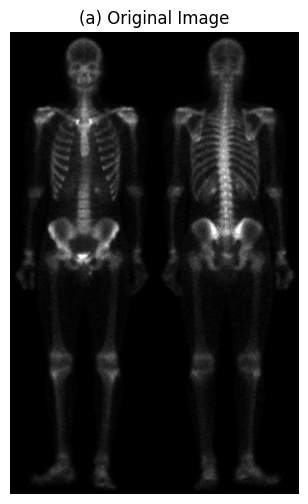

In [122]:
# (a) Image of whole body bone scan:
image = cv2.imread('Sample_3.tif')

# Plotting the original image
plotting_image(image, '(a) Original Image')
cv2.imwrite('S20200010212_SDF_output_a.jpg', image)


True

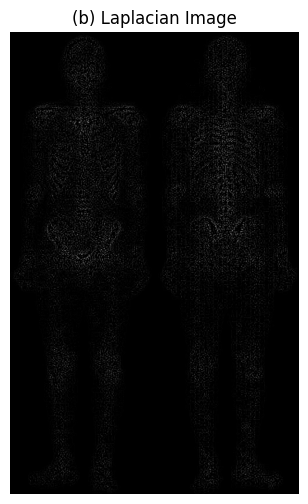

In [123]:
# (b) Laplacian of (a):
kernel_array = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_image = cv2.filter2D(image, -1, kernel_array)
laplacian_image = normalize_function(laplacian_image)
gray = cv2.cvtColor(laplacian_image, cv2.COLOR_BGR2GRAY)

grayImage(gray, '(b) Laplacian Image')
cv2.imwrite('S20200010212_SDF_output_b.jpg', gray)


True

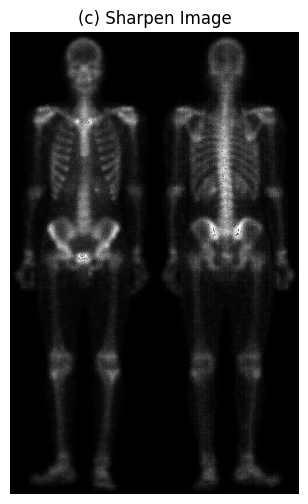

In [124]:
# (c) sharpen image obtained by adding (a) and (b):
sharpen_image = image + laplacian_image
sharpen_image = normalize_function(sharpen_image)
plotting_image(sharpen_image, '(c) Sharpen Image')
cv2.imwrite('S20200010212_SDF_output_c.jpg', sharpen_image)


True

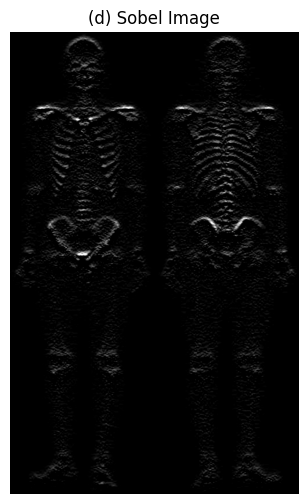

In [125]:
# (d) Sobel gradient of (a):
kernel_array = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_image = cv2.filter2D(image, -1, kernel_array)
sobel_image = normalize_function(sobel_image)

plotting_image(sobel_image, '(d) Sobel Image')
cv2.imwrite('S20200010212_SDF_output_d.jpg', sobel_image)


True

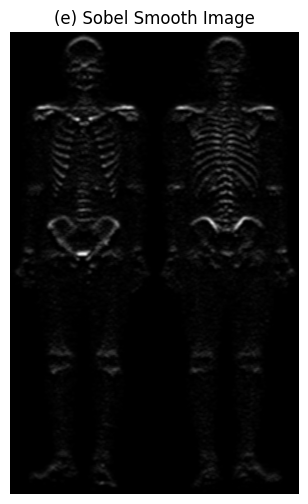

In [126]:
# (e) Sobel image smoothed with a 5x5 averaging filter:
kernel_array = np.ones((5, 5), np.float32)/25
sobel_image_smooth = cv2.filter2D(sobel_image, -1, kernel_array)
sobel_image_smooth = normalize_function(sobel_image_smooth)

plotting_image(sobel_image_smooth, '(e) Sobel Smooth Image')
cv2.imwrite('S20200010212_SDF_output_e.jpg', sobel_image_smooth)


True

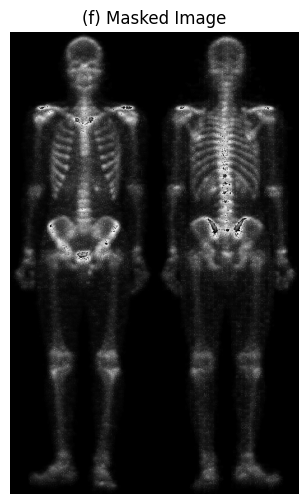

In [127]:
# (f) Mask image formed by the product of (c) and (e):
kernals = 1
masked_image = sobel_image_smooth + kernals*(image+laplacian_image)
masked_image = normalize_function(masked_image)

plotting_image(masked_image, '(f) Masked Image')
cv2.imwrite('S20200010212_SDF_output_f.jpg', masked_image)


True

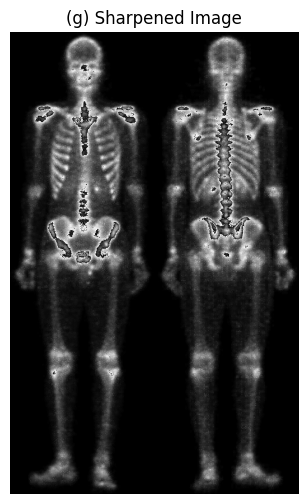

In [128]:
# (g) Sharpened image obtained by adding (a) and (f):
Image_masked = image+masked_image
Image_masked = normalize_function(Image_masked)

plotting_image(Image_masked, '(g) Sharpened Image')
cv2.imwrite('S20200010212_SDF_output_g.jpg', Image_masked)


True

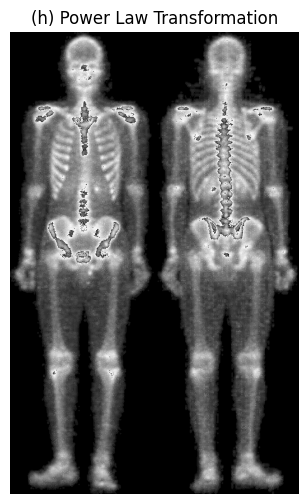

In [129]:
# (h) Final result obtained by applying a power law transformation to (g):
power_law_transformation = np.array(255*(Image_masked/255)**0.5, dtype='uint8')
power_law_transformation = normalize_function(power_law_transformation)

plotting_image(power_law_transformation, '(h) Power Law Transformation')
cv2.imwrite('S20200010212_SDF_output_h.jpg', power_law_transformation)


In [130]:
# Compare (g) and (h) with the original image (a). What do you observe?
# The original image is very dark and the power law transformation is very bright. The power law transformation is better than the original image.
